In [10]:
# Aldair de Jesus de Leon Hernandez
# Actividad Arbol de decisiones en Temperaturas
# Modificar los parámetros de la clase sklearn.tree.DecisionTreeRegressor para obtener la precisión más alta
# Debe mejorar el valor obtenido en clase

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('temps.csv')
df.head()
anios = df['year']
meses = df['month']
dias = df['day']
fechas = ['{}-{}-{}'.format(anio , mes , dia) for anio, mes, dia in zip(anios , meses , dias)]
fechas = [datetime.datetime.strptime(fecha, '%Y-%m-%d') for fecha in fechas]
df['actual'] = df['actual'].apply(lambda F : (F-32)*(5/9))
df['temp_1'] = df['temp_1'].apply(lambda F : (F-32)*(5/9))
df['temp_2'] = df['temp_2'].apply(lambda F : (F-32)*(5/9))
df['average'] = df['average'].apply(lambda F : (F-32)*(5/9))
df['forecast_noaa'] = df['forecast_noaa'].apply(lambda F : (F-32)*(5/9))
df['forecast_acc'] = df['forecast_acc'].apply(lambda F : (F-32)*(5/9))
df['forecast_under'] = df['forecast_under'].apply(lambda F : (F-32)*(5/9))
df['friend'] = df['friend'].apply(lambda F : (F-32)*(5/9))
df = pd.get_dummies(df)

In [4]:
etiquetas = np.array(df['actual'])
caracteristicas = df.drop('actual' , axis = 1)
nom_cols = list(caracteristicas.columns)
caracteristicas = np.array(caracteristicas)
X = caracteristicas
y = etiquetas

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 0)

In [6]:
dtr = DecisionTreeRegressor(criterion = 'poisson' , min_samples_split = 30 , min_samples_leaf = 2 , random_state = 0)

In [7]:
dtr.fit(X_train , y_train)

DecisionTreeRegressor(criterion='poisson', min_samples_leaf=2,
                      min_samples_split=30, random_state=0)

In [8]:
y_pred = dtr.predict(X_test)
error = abs(y_test-y_pred)
np.mean(error)
#El error obtenido en clase es 2.667

2.106486576327846

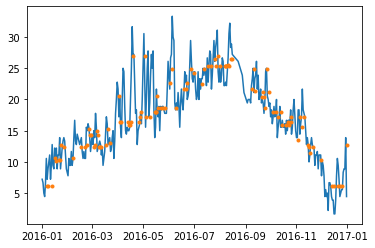

In [9]:
anios = X_test[: , nom_cols.index('year')]
meses = X_test[: , nom_cols.index('month')]
dias = X_test[: , nom_cols.index('day')]
fechas_test = ['{}-{}-{}'.format(int(anio) , int(mes) , int(dia)) for anio, mes, dia in zip(anios , meses , dias)]
fechas_test = [datetime.datetime.strptime(fecha, '%Y-%m-%d') for fecha in fechas_test]

plt.plot(fechas , df['actual'])
plt.plot(fechas_test , y_pred , linestyle = 'None' , marker = 'o' , markersize = 3);